# Compare Manual vs Automated Meta-Analysis Results

This notebook compares results from manual meta-analyses (NeuroMetaBench) with automated meta-analyses (autonima-results) using:

1. Correlation matrices (R²) between all pairs
2. Dice coefficients for spatial overlap
3. Visual comparison using nilearn plotting

In [83]:
import os
import numpy as np
import nibabel as nib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from pathlib import Path
from nilearn import plotting

## Setup Paths and Mappings

In [ ]:
repos_dir = '/home/zorro/repos'

social_meta_path = 'neurometabench/analysis/social'
social_automated_meta_path = 'autonima-results/social-processing-coordinate/rev2-all_pmids/outputs/meta_analysis_results'

# Mapping from NeuroMetaBench social analysis names to autonima-results social analysis names
mappings = {
    "Affiliation-Merged": 'affiliation_attachment',
    "Self-Merged": 'perception_self',
    "Others-Merged": 'perception_others',
    "SocComm-Merged": 'social_communication',
    "ALL-Merged": 'social_processing_all',
}

# Filename to load
result_file = 'z.nii.gz'

# Axial slice coordinates for visualization
display_coords = [-42, -25, -8, 10, 28, 45, 62]

## Load All NIfTI Files

In [85]:
def load_nifti_data(base_dir, subdir, filename):
    """Load a NIfTI file and return the data array."""
    filepath = os.path.join(base_dir, subdir, filename)
    if not os.path.exists(filepath):
        print(f"Warning: File not found: {filepath}")
        return None, None
    
    img = nib.load(filepath)
    data = img.get_fdata()
    print(f"Loaded {filepath} with shape {data.shape}")
    return data, filepath

# Load manual meta-analysis results
manual_data = {}
manual_paths = {}
for manual_name in mappings.keys():
    manual_dir = os.path.join(repos_dir, social_meta_path, manual_name)
    data, filepath = load_nifti_data(repos_dir, os.path.join(social_meta_path, manual_name), result_file)
    if data is not None:
        manual_data[manual_name] = data
        manual_paths[manual_name] = filepath

# Load automated meta-analysis results
automated_data = {}
automated_paths = {}
for manual_name, auto_name in mappings.items():
    auto_dir = os.path.join(social_automated_meta_path, auto_name)
    data, filepath = load_nifti_data(repos_dir, auto_dir, result_file)
    if data is not None:
        automated_data[manual_name] = data
        automated_paths[manual_name] = filepath

print(f"\nLoaded {len(manual_data)} manual analyses")
print(f"Loaded {len(automated_data)} automated analyses")

Loaded /home/zorro/repos/neurometabench/analysis/social/Affiliation-Merged/z.nii.gz with shape (91, 109, 91)
Loaded /home/zorro/repos/neurometabench/analysis/social/Self-Merged/z.nii.gz with shape (91, 109, 91)
Loaded /home/zorro/repos/neurometabench/analysis/social/Others-Merged/z.nii.gz with shape (91, 109, 91)
Loaded /home/zorro/repos/neurometabench/analysis/social/SocComm-Merged/z.nii.gz with shape (91, 109, 91)
Loaded /home/zorro/repos/neurometabench/analysis/social/ALL-Merged/z.nii.gz with shape (91, 109, 91)
Loaded /home/zorro/repos/autonima-results/social-processing-coordinate/rev2/outputs/meta_analysis_results/affiliation_attachment/z.nii.gz with shape (91, 109, 91)
Loaded /home/zorro/repos/autonima-results/social-processing-coordinate/rev2/outputs/meta_analysis_results/perception_self/z.nii.gz with shape (91, 109, 91)
Loaded /home/zorro/repos/autonima-results/social-processing-coordinate/rev2/outputs/meta_analysis_results/perception_others/z.nii.gz with shape (91, 109, 91)
Lo

## Visualize All Images Using Nilearn

### Paired Manual and Automated Results


COMPARISON: ALL-Merged


/tmp/ipykernel_239368/123338958.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


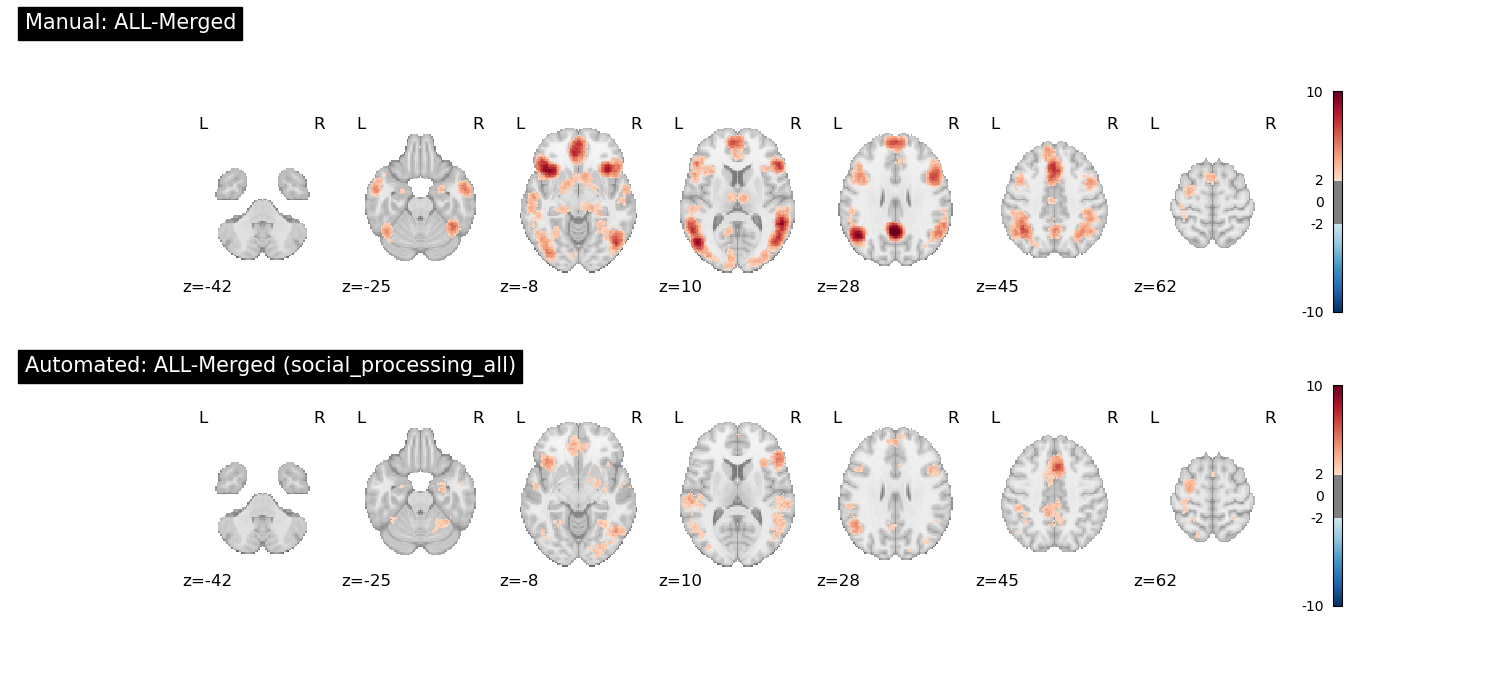


COMPARISON: Affiliation-Merged


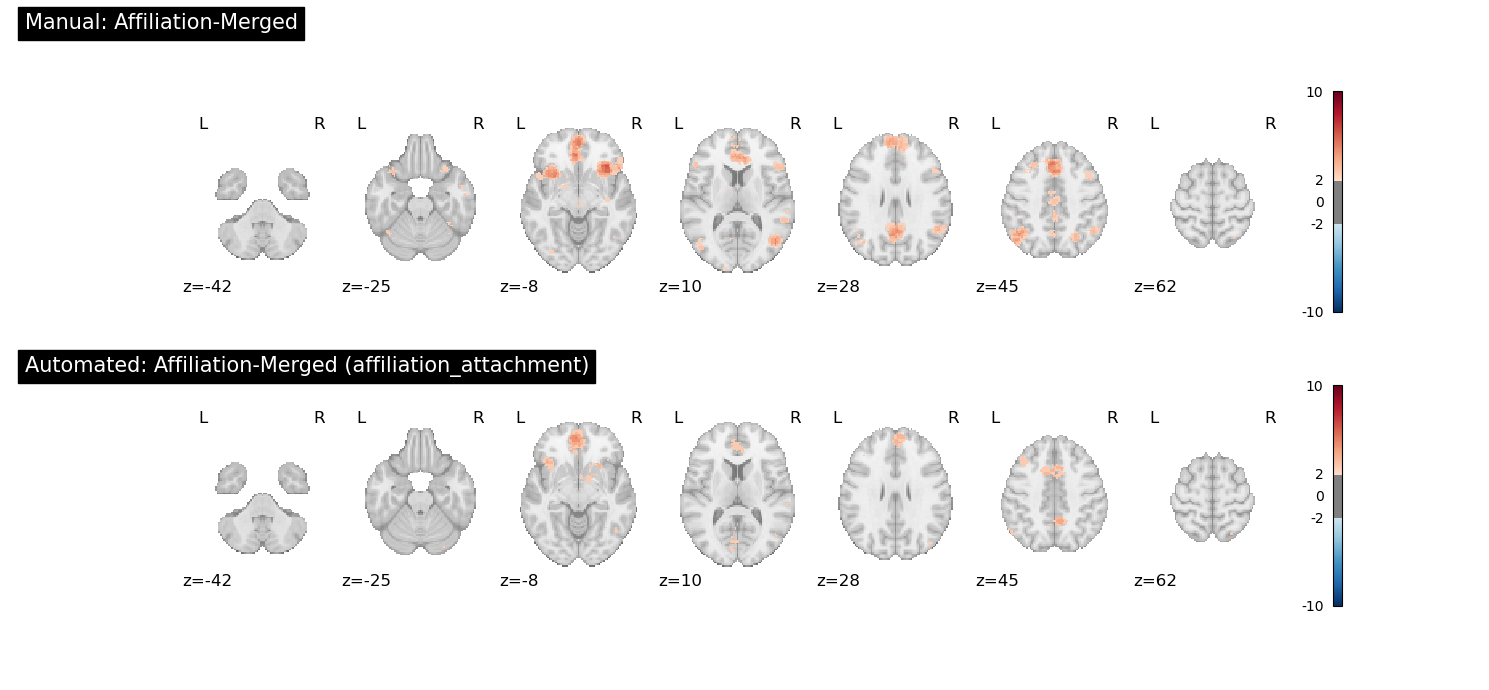


COMPARISON: Others-Merged


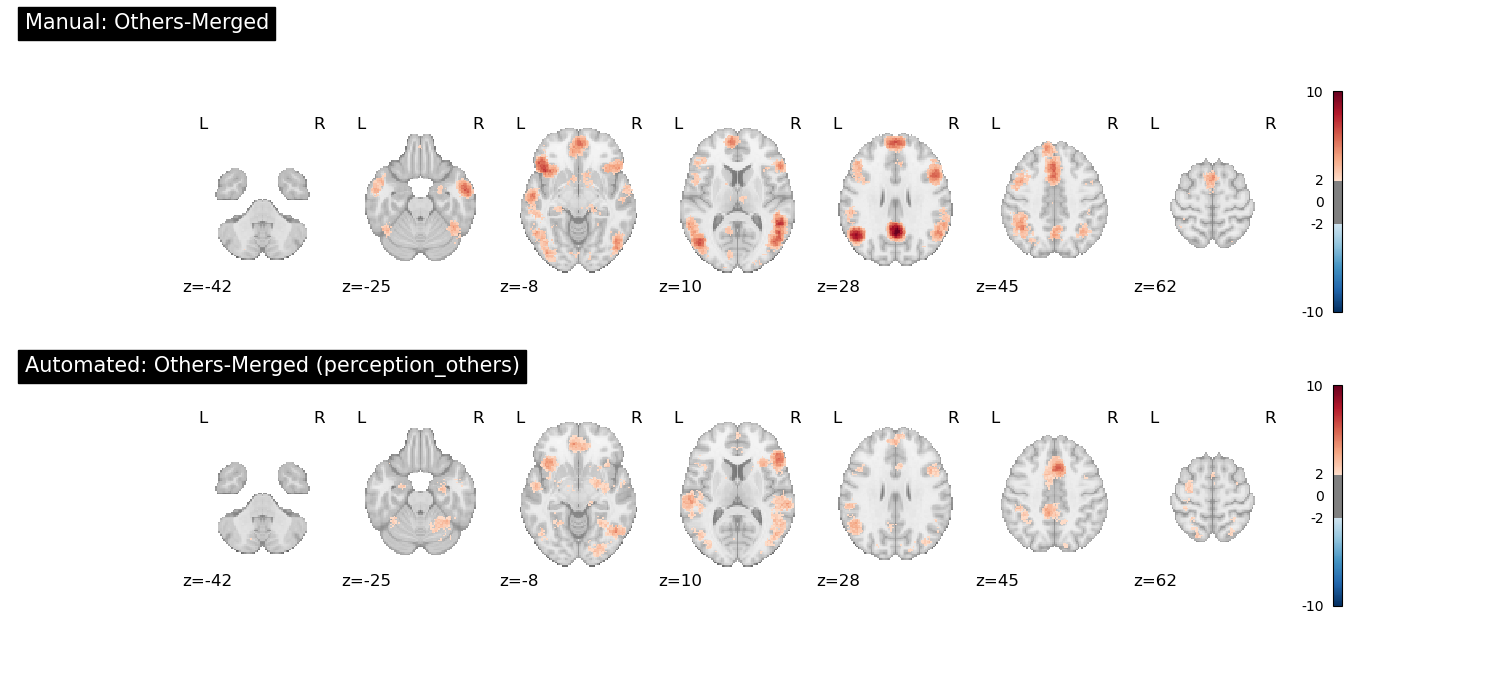


COMPARISON: Self-Merged


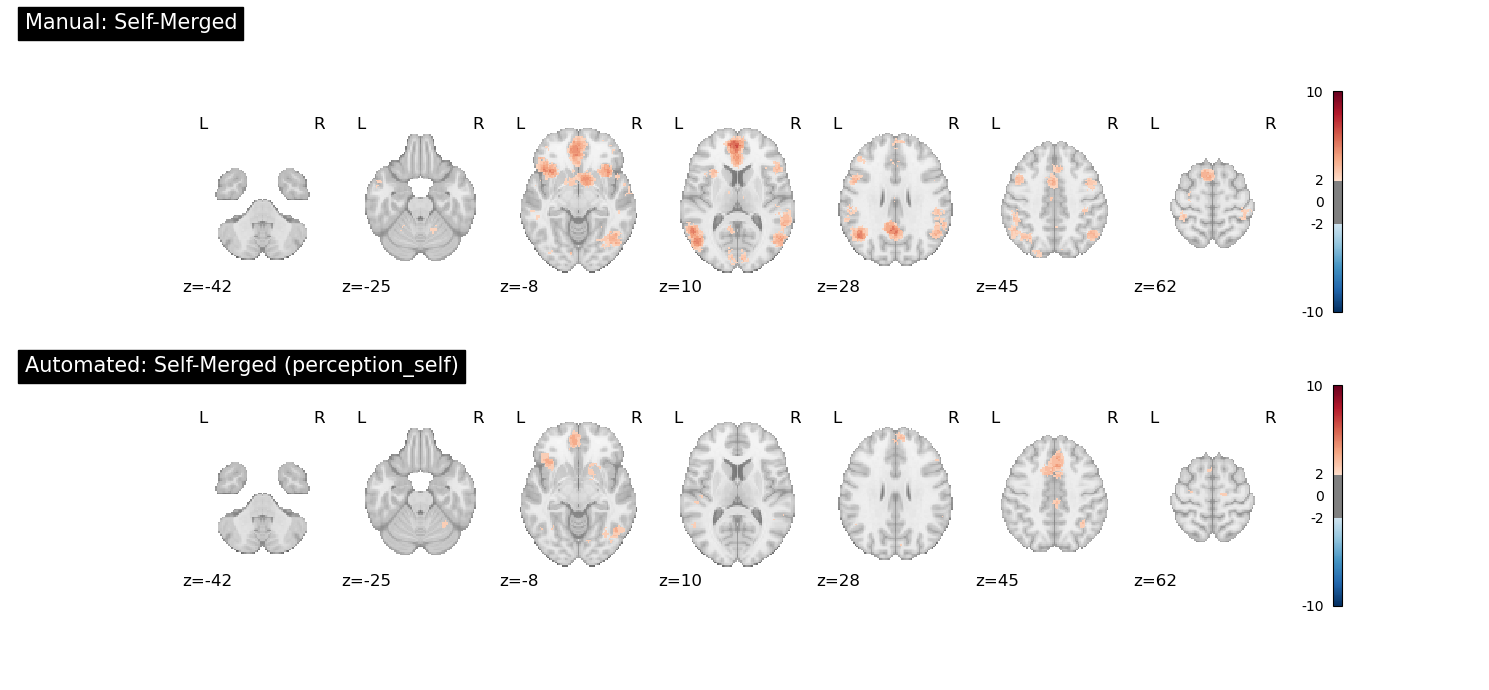


COMPARISON: SocComm-Merged


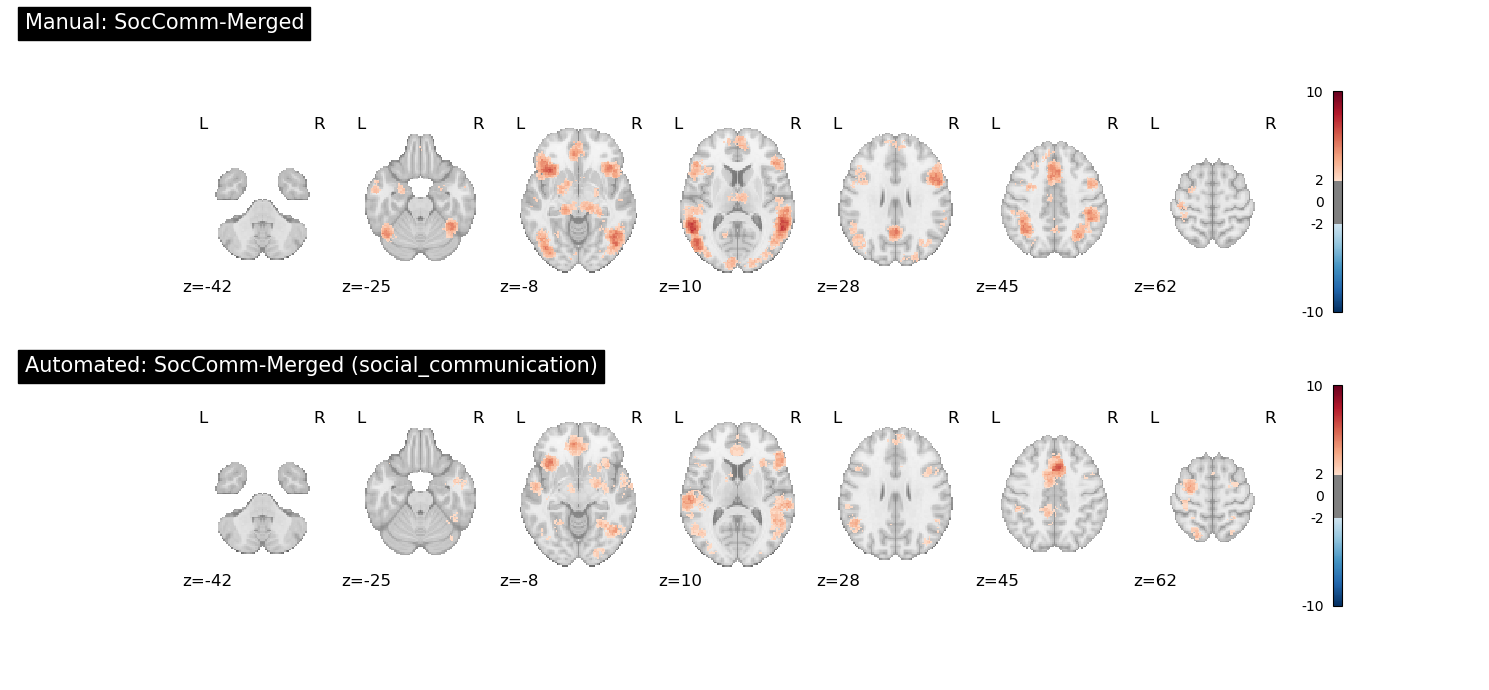

In [86]:
for name in sorted(manual_paths.keys()):
    print(f"\n{'='*70}")
    print(f"COMPARISON: {name}")
    print(f"{'='*70}")
    
    fig, axes = plt.subplots(2, 1, figsize=(15, 7))
    
    # Manual
    display1 = plotting.plot_stat_map(
        manual_paths[name],
        display_mode='z',
        cut_coords=display_coords,
        title=f"Manual: {name}",
        colorbar=True,
        cmap='RdBu_r',
        symmetric_cbar=True,
        threshold=1.96,
        vmax=10,
        axes=axes[0],
        figure=fig
    )
    
    # Automated
    display2 = plotting.plot_stat_map(
        automated_paths[name],
        display_mode='z',
        cut_coords=display_coords,
        title=f"Automated: {name} ({mappings[name]})",
        colorbar=True,
        cmap='RdBu_r',
        symmetric_cbar=True,
        threshold=1.96,
        vmax=10,
        axes=axes[1],
        figure=fig
    )
    
    plt.tight_layout()
    plt.savefig(f'comparison_{name.replace("-", "_").lower()}.png', dpi=300, bbox_inches='tight')
    plt.show()

## Flatten Data for Correlation Analysis

In [87]:
def flatten_data(data_dict):
    """Flatten 3D brain data to 1D vectors, removing NaN/Inf values."""
    flattened = {}
    for name, data in data_dict.items():
        flat = data.flatten()
        # Remove NaN and Inf values
        valid_mask = np.isfinite(flat)
        flattened[name] = flat[valid_mask]
        print(f"{name}: {np.sum(valid_mask)} valid voxels out of {len(flat)}")
    return flattened

manual_flat = flatten_data(manual_data)
automated_flat = flatten_data(automated_data)

Affiliation-Merged: 902629 valid voxels out of 902629
Self-Merged: 902629 valid voxels out of 902629
Others-Merged: 902629 valid voxels out of 902629
SocComm-Merged: 902629 valid voxels out of 902629
ALL-Merged: 902629 valid voxels out of 902629
Affiliation-Merged: 902629 valid voxels out of 902629
Self-Merged: 902629 valid voxels out of 902629
Others-Merged: 902629 valid voxels out of 902629
SocComm-Merged: 902629 valid voxels out of 902629
ALL-Merged: 902629 valid voxels out of 902629


## Create Mask for Common Valid Voxels

In [88]:
def create_common_mask(data_dict):
    """Create a mask of voxels that are valid (finite) across all images."""
    masks = []
    for name, data in data_dict.items():
        masks.append(np.isfinite(data))
    
    if len(masks) == 0:
        return None
    
    # Combine all masks - voxel must be valid in ALL images
    common_mask = masks[0]
    for mask in masks[1:]:
        common_mask = common_mask & mask
    
    print(f"Common mask: {np.sum(common_mask)} valid voxels")
    return common_mask

# Create common mask across all data
all_data = {**manual_data, **automated_data}
common_mask = create_common_mask(all_data)

# Apply common mask to all data
manual_masked = {name: data.flatten()[common_mask.flatten()] for name, data in manual_data.items()}
automated_masked = {name: data.flatten()[common_mask.flatten()] for name, data in automated_data.items()}

Common mask: 902629 valid voxels


## Compute Correlation Matrix (R²)

In [89]:
def compute_correlation_matrix(manual_dict, automated_dict):
    """Compute correlation matrix between all manual and automated analyses."""
    analysis_names = list(manual_dict.keys())
    n = len(analysis_names)
    
    # Create matrix: rows are manual, columns are automated
    corr_matrix = np.zeros((n, n))
    r2_matrix = np.zeros((n, n))
    
    for i, manual_name in enumerate(analysis_names):
        for j, auto_key in enumerate(analysis_names):
            manual_vec = manual_dict[manual_name]
            auto_vec = automated_dict[auto_key]
            
            # Compute Pearson correlation
            r, p = pearsonr(manual_vec, auto_vec)
            corr_matrix[i, j] = r
            r2_matrix[i, j] = r**2
    
    return corr_matrix, r2_matrix, analysis_names

corr_matrix, r2_matrix, analysis_names = compute_correlation_matrix(manual_masked, automated_masked)

print("\nCorrelation Matrix (r):")
print(pd.DataFrame(corr_matrix, index=analysis_names, columns=analysis_names).round(3))

print("\nR² Matrix:")
print(pd.DataFrame(r2_matrix, index=analysis_names, columns=analysis_names).round(3))


Correlation Matrix (r):
                    Affiliation-Merged  Self-Merged  Others-Merged  \
Affiliation-Merged               0.488        0.447          0.471   
Self-Merged                      0.485        0.478          0.510   
Others-Merged                    0.446        0.501          0.600   
SocComm-Merged                   0.371        0.439          0.623   
ALL-Merged                       0.485        0.519          0.665   

                    SocComm-Merged  ALL-Merged  
Affiliation-Merged           0.470       0.505  
Self-Merged                  0.526       0.543  
Others-Merged                0.575       0.639  
SocComm-Merged               0.584       0.635  
ALL-Merged                   0.642       0.697  

R² Matrix:
                    Affiliation-Merged  Self-Merged  Others-Merged  \
Affiliation-Merged               0.239        0.200          0.222   
Self-Merged                      0.235        0.228          0.260   
Others-Merged                    0.199

## Visualize Correlation Matrix

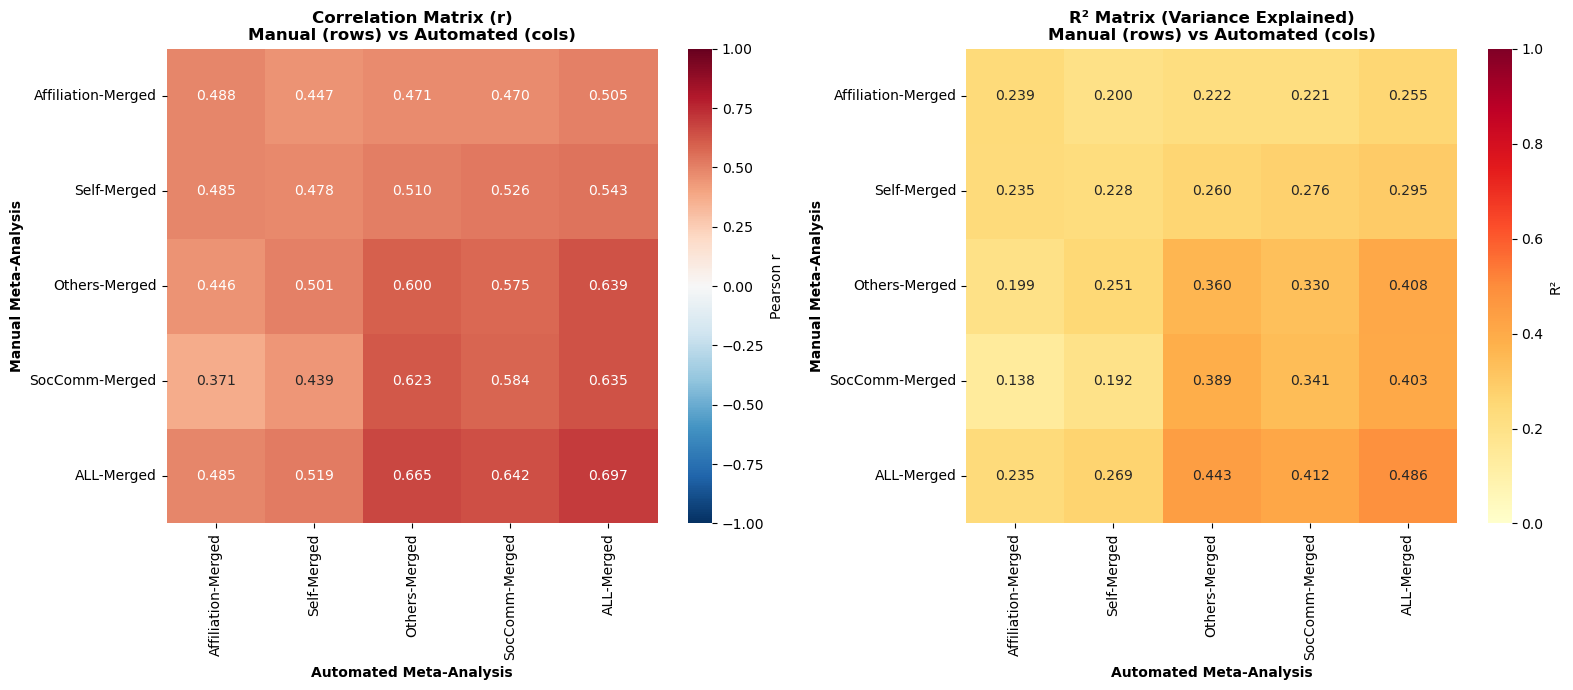


=== MATCHING COMPARISONS (Diagonal) ===
Affiliation-Merged: r = 0.488, R² = 0.239
Self-Merged: r = 0.478, R² = 0.228
Others-Merged: r = 0.600, R² = 0.360
SocComm-Merged: r = 0.584, R² = 0.341
ALL-Merged: r = 0.697, R² = 0.486


In [90]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Plot correlation matrix (r)
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='RdBu_r', center=0,
            xticklabels=analysis_names, yticklabels=analysis_names,
            vmin=-1, vmax=1, ax=axes[0], cbar_kws={'label': 'Pearson r'})
axes[0].set_title('Correlation Matrix (r)\nManual (rows) vs Automated (cols)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Automated Meta-Analysis', fontweight='bold')
axes[0].set_ylabel('Manual Meta-Analysis', fontweight='bold')

# Plot R² matrix
sns.heatmap(r2_matrix, annot=True, fmt='.3f', cmap='YlOrRd',
            xticklabels=analysis_names, yticklabels=analysis_names,
            vmin=0, vmax=1, ax=axes[1], cbar_kws={'label': 'R²'})
axes[1].set_title('R² Matrix (Variance Explained)\nManual (rows) vs Automated (cols)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Automated Meta-Analysis', fontweight='bold')
axes[1].set_ylabel('Manual Meta-Analysis', fontweight='bold')

plt.tight_layout()
plt.savefig('correlation_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

# Extract and highlight diagonal (matching comparisons)
print("\n=== MATCHING COMPARISONS (Diagonal) ===")
for i, name in enumerate(analysis_names):
    print(f"{name}: r = {corr_matrix[i, i]:.3f}, R² = {r2_matrix[i, i]:.3f}")

## Compute Dice Coefficients

In [91]:
def compute_dice_coefficient(img1, img2, threshold=0):
    """Compute Dice coefficient between two binary masks.
    
    Args:
        img1, img2: Arrays to compare
        threshold: Threshold to binarize images (default: 0)
    
    Returns:
        dice: Dice coefficient (0-1)
    """
    # Binarize images
    binary1 = img1 > threshold
    binary2 = img2 > threshold
    
    # Compute intersection and union
    intersection = np.sum(binary1 & binary2)
    sum_volumes = np.sum(binary1) + np.sum(binary2)
    
    if sum_volumes == 0:
        return 0.0
    
    dice = (2.0 * intersection) / sum_volumes
    return dice

def compute_dice_matrix(manual_dict, automated_dict, threshold=0):
    """Compute Dice coefficient matrix between all manual and automated analyses."""
    analysis_names = list(manual_dict.keys())
    n = len(analysis_names)
    
    # Create matrix: rows are manual, columns are automated
    dice_matrix = np.zeros((n, n))
    
    for i, manual_name in enumerate(analysis_names):
        for j, auto_key in enumerate(analysis_names):
            manual_vec = manual_dict[manual_name]
            auto_vec = automated_dict[auto_key]
            
            dice = compute_dice_coefficient(manual_vec, auto_vec, threshold)
            dice_matrix[i, j] = dice
    
    return dice_matrix, analysis_names

# Compute Dice coefficients with threshold = 0 (positive values)
dice_matrix, analysis_names = compute_dice_matrix(manual_masked, automated_masked, threshold=0)

print("\nDice Coefficient Matrix (threshold=0):")
print(pd.DataFrame(dice_matrix, index=analysis_names, columns=analysis_names).round(3))


Dice Coefficient Matrix (threshold=0):
                    Affiliation-Merged  Self-Merged  Others-Merged  \
Affiliation-Merged               0.501        0.424          0.502   
Self-Merged                      0.571        0.432          0.577   
Others-Merged                    0.602        0.460          0.634   
SocComm-Merged                   0.577        0.421          0.622   
ALL-Merged                       0.606        0.452          0.652   

                    SocComm-Merged  ALL-Merged  
Affiliation-Merged           0.507       0.527  
Self-Merged                  0.586       0.607  
Others-Merged                0.634       0.665  
SocComm-Merged               0.620       0.656  
ALL-Merged                   0.651       0.686  


## Visualize Dice Coefficient Matrix

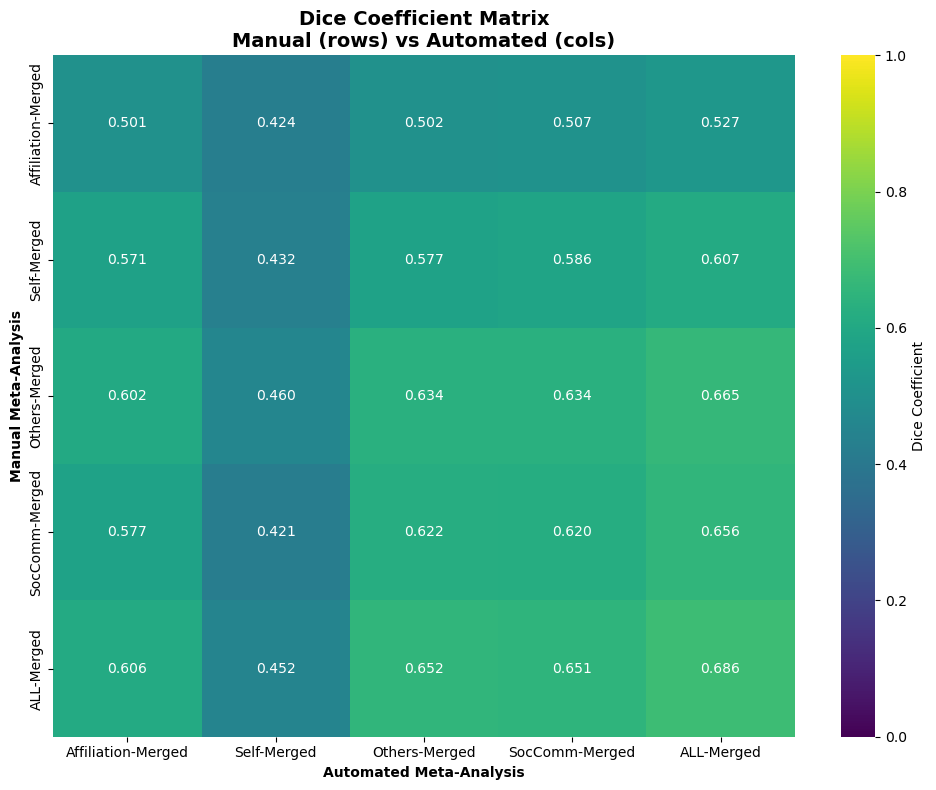


=== MATCHING COMPARISONS (Diagonal) ===
Affiliation-Merged: Dice = 0.501
Self-Merged: Dice = 0.432
Others-Merged: Dice = 0.634
SocComm-Merged: Dice = 0.620
ALL-Merged: Dice = 0.686


In [92]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(dice_matrix, annot=True, fmt='.3f', cmap='viridis',
            xticklabels=analysis_names, yticklabels=analysis_names,
            vmin=0, vmax=1, ax=ax, cbar_kws={'label': 'Dice Coefficient'})

ax.set_title('Dice Coefficient Matrix\nManual (rows) vs Automated (cols)', fontsize=14, fontweight='bold')
ax.set_xlabel('Automated Meta-Analysis', fontweight='bold')
ax.set_ylabel('Manual Meta-Analysis', fontweight='bold')

plt.tight_layout()
plt.savefig('dice_coefficient_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Extract and highlight diagonal (matching comparisons)
print("\n=== MATCHING COMPARISONS (Diagonal) ===")
for i, name in enumerate(analysis_names):
    print(f"{name}: Dice = {dice_matrix[i, i]:.3f}")

## Try Multiple Thresholds for Dice Coefficient

In [93]:
thresholds = [0, 1.0, 1.96, 2.0, 3.0]
diagonal_dice_values = {}

for threshold in thresholds:
    dice_mat, _ = compute_dice_matrix(manual_masked, automated_masked, threshold=threshold)
    
    print(f"\nDice Coefficients at threshold={threshold}:")
    for i, name in enumerate(analysis_names):
        if name not in diagonal_dice_values:
            diagonal_dice_values[name] = []
        diagonal_dice_values[name].append(dice_mat[i, i])
        print(f"  {name}: {dice_mat[i, i]:.3f}")


Dice Coefficients at threshold=0:
  Affiliation-Merged: 0.501
  Self-Merged: 0.432
  Others-Merged: 0.634
  SocComm-Merged: 0.620
  ALL-Merged: 0.686

Dice Coefficients at threshold=1.0:
  Affiliation-Merged: 0.414
  Self-Merged: 0.291
  Others-Merged: 0.535
  SocComm-Merged: 0.454
  ALL-Merged: 0.551

Dice Coefficients at threshold=1.96:
  Affiliation-Merged: 0.213
  Self-Merged: 0.207
  Others-Merged: 0.402
  SocComm-Merged: 0.389
  ALL-Merged: 0.412

Dice Coefficients at threshold=2.0:
  Affiliation-Merged: 0.213
  Self-Merged: 0.207
  Others-Merged: 0.328
  SocComm-Merged: 0.389
  ALL-Merged: 0.412

Dice Coefficients at threshold=3.0:
  Affiliation-Merged: 0.161
  Self-Merged: 0.129
  Others-Merged: 0.223
  SocComm-Merged: 0.200
  ALL-Merged: 0.288


## Plot Dice Coefficients Across Thresholds

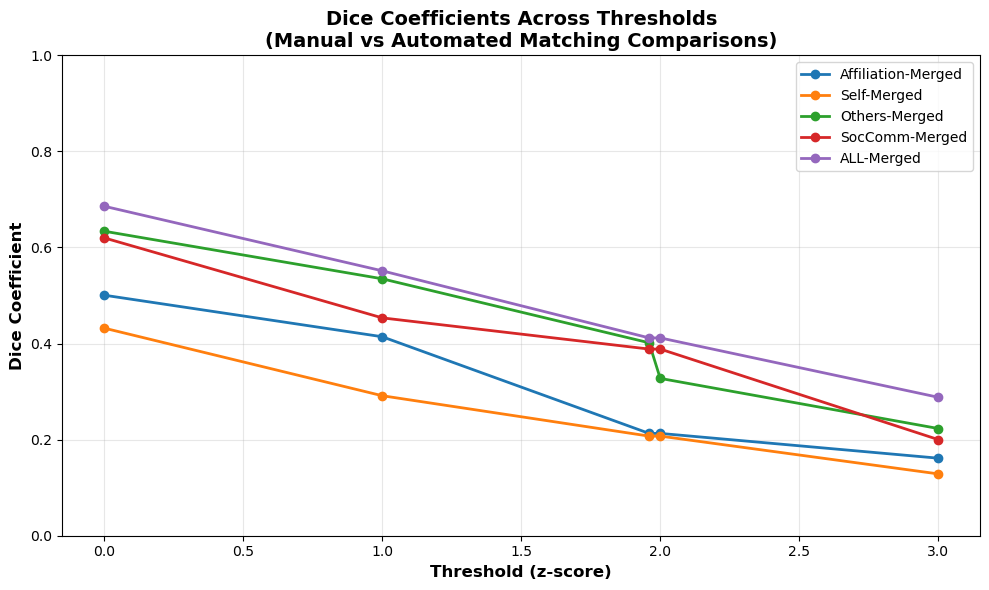

In [94]:
fig, ax = plt.subplots(figsize=(10, 6))

for name in analysis_names:
    ax.plot(thresholds, diagonal_dice_values[name], marker='o', label=name, linewidth=2)

ax.set_xlabel('Threshold (z-score)', fontsize=12, fontweight='bold')
ax.set_ylabel('Dice Coefficient', fontsize=12, fontweight='bold')
ax.set_title('Dice Coefficients Across Thresholds\n(Manual vs Automated Matching Comparisons)', 
             fontsize=14, fontweight='bold')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)
ax.set_ylim([0, 1])

plt.tight_layout()
plt.savefig('dice_vs_threshold.png', dpi=300, bbox_inches='tight')
plt.show()

## Summary Statistics

In [95]:
summary_data = []
for i, name in enumerate(analysis_names):
    summary_data.append({
        'Analysis': name,
        'Correlation (r)': corr_matrix[i, i],
        'R²': r2_matrix[i, i],
        'Dice (t=0)': dice_matrix[i, i],
        'Dice (t=1.96)': diagonal_dice_values[name][thresholds.index(1.96)]
    })

summary_df = pd.DataFrame(summary_data)
print("\n" + "="*70)
print("SUMMARY: Manual vs Automated Meta-Analysis Comparison")
print("="*70)
print(summary_df.to_string(index=False))
print("="*70)

# Save summary to CSV
summary_df.to_csv('comparison_summary.csv', index=False)
print("\nSummary saved to: comparison_summary.csv")


SUMMARY: Manual vs Automated Meta-Analysis Comparison
          Analysis  Correlation (r)       R²  Dice (t=0)  Dice (t=1.96)
Affiliation-Merged         0.488489 0.238622    0.500752       0.212994
       Self-Merged         0.477839 0.228330    0.432189       0.207365
     Others-Merged         0.599941 0.359929    0.633932       0.401643
    SocComm-Merged         0.584222 0.341315    0.620075       0.388548
        ALL-Merged         0.696980 0.485781    0.685943       0.411800

Summary saved to: comparison_summary.csv
